In [ ]:
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()


In [ ]:
pumpkins.isnull().sum()

In [4]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']

pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [ ]:
pumpkins.head()

In [6]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) /2

month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price']})

In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1+ 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)


In [8]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


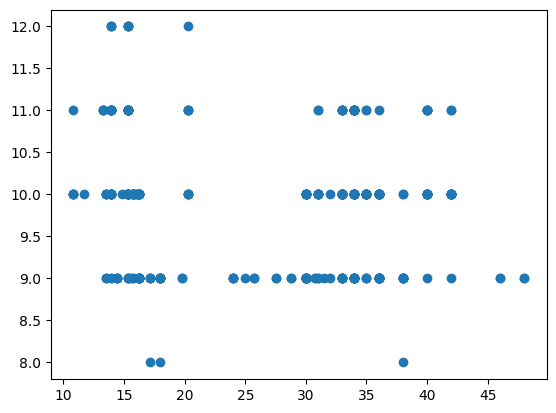

In [9]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'pumpkin Price')

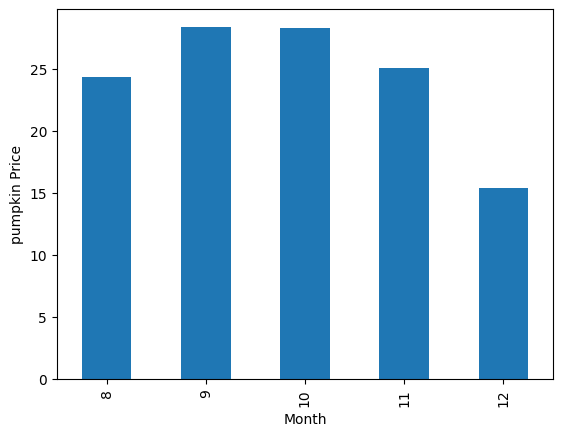

In [11]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')

plt.ylabel('pumpkin Price')